## Experiment to Visualize LFP Decision Boundaries on Toy Data

### Imports

In [1]:
import os

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import matplotlib.pyplot as plt
import numpy as np
import torch

from experiment_utils.data import dataloaders as dataloaders
from experiment_utils.data import datasets as datasets
from experiment_utils.data import transforms as transforms
from experiment_utils.evaluation import evaluate as evaluate
from experiment_utils.model import models as models
from lfprop.rewards import rewards as rewards

### Paths, Dataset, Model

In [2]:
savepath = "<path to save results in>"
os.makedirs(savepath, exist_ok=True)

In [3]:
# Plot Settings
# Set font properties.
import matplotlib.font_manager as font_manager

font_path = plt.matplotlib.get_data_path() + "/fonts/ttf/cmr10.ttf"
cmfont = font_manager.FontProperties(fname=font_path)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = cmfont.get_name()
plt.rcParams["mathtext.fontset"] = "cm"

# Set font size.
plt.rcParams["font.size"] = 15

# Disable unicode minus.
plt.rcParams["axes.unicode_minus"] = False

# Use mathtext for axes formatters.
plt.rcParams["axes.formatter.use_mathtext"] = True

plt.rcParams["axes.linewidth"] = 1.5

import matplotlib.cm as cm

relu


/tmp/ipykernel_128095/2845298683.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap, 256)


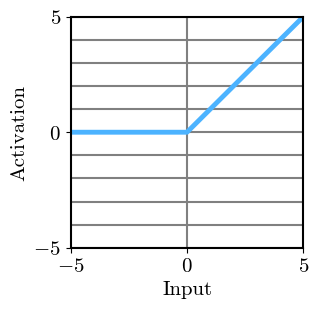

sigmoid


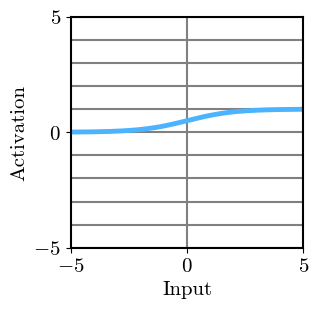

silu


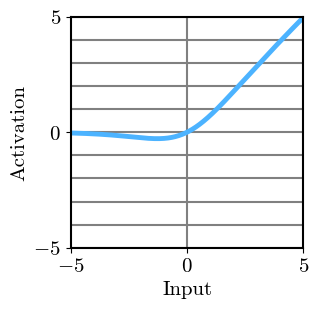

leakyrelu


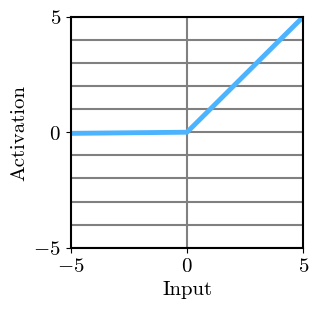

tanh


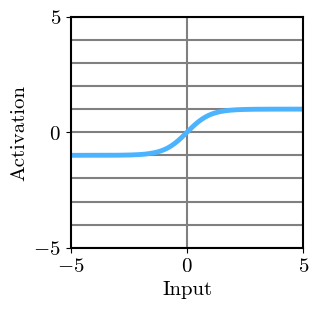

elu


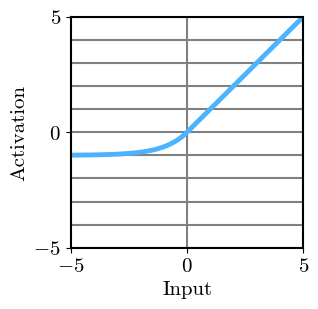

step


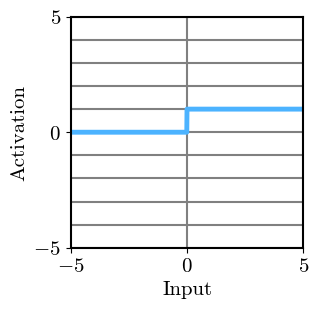

In [4]:
def plot_activation(fn, xlim=(-2, 2), colormap="cool", fname=""):

    pastel = 0.0
    cmap = cm.get_cmap(colormap, 256)
    palette = cmap(np.linspace(0.3, 0.7, 256))
    palette = (1 - pastel) * palette + pastel * np.ones((256, 4))

    fig, ax = plt.subplots(1, 1, figsize=(3, 3))

    data = torch.arange(xlim[0], xlim[1], 0.01)
    act = fn()(data)

    ax.plot(data, act, color=palette[0], linewidth=3.5, alpha=1)
    linelocs = [0.0]
    ax.vlines(linelocs, ymin=xlim[0], ymax=xlim[1], color=(0.5, 0.5, 0.5, 1), linewidth=1.5, zorder=0)
    linelocs = np.arange(xlim[0], xlim[1] + 1.0, 1.0)
    ax.hlines(linelocs, xmin=xlim[0], xmax=xlim[1], color=(0.5, 0.5, 0.5, 1), linewidth=1.5, zorder=0)

    ax.set_xlabel("Input")
    ax.set_ylabel("Activation")
    ax.set_xticks([-5, 0, 5])
    ax.set_yticks([-5, 0, 5])
    ax.set_xlim([xlim[0], xlim[1]])
    ax.set_ylim([xlim[0], xlim[1]])

    plt.show()

    fig.savefig(fname)


for name, activation in models.ACTIVATION_MAP.items():
    print(name)
    plot_activation(activation, xlim=(-5, 5), colormap="cool", fname=os.path.join(savepath, f"activation-{name}.svg"))